In [ ]:
import osmnx as ox, geopandas as gpd, pandas as pd, networkx as nx
from IPython.display import Image
%matplotlib inline
#time consuming
ox.config(log_console= True, use_cache=True)
import pandas as pd

/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [ ]:
# Tehran
import geopandas as gpd

# create a graph, save as a GeoPackage
fp = 'graph.gpkg'
G_Tehran = ox.graph_from_point((35.673744, 51.422562), dist= 27000, dist_type='bbox', network_type ='drive')
ox.save_graph_geopackage(G_Tehran, fp)
# ensure the index attributes are non-null when you're finished
pass

# load GeoPackage as node/edge GeoDataFrames indexed as described in OSMnx docs
gdf_nodes = gpd.read_file(fp, layer='nodes').set_index('osmid')
gdf_edges = gpd.read_file(fp, layer='edges').set_index(['u', 'v', 'key'])
assert gdf_nodes.index.is_unique and gdf_edges.index.is_unique

# convert the node/edge GeoDataFrames to a MultiDiGraph
graph_attrs = {'crs': 'epsg:4326', 'simplified': True}
G_Tehran_gdf = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
ox.plot_graph(G_Tehran_gdf, node_size= 0 , node_color = 'm', edge_color= 'gray',
              bgcolor='white', edge_linewidth= 0.1, filepath = '/content/Tehran_cityy.png',save=True)

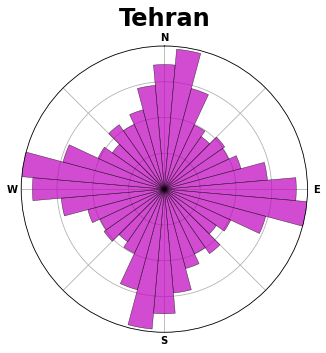

In [ ]:
import matplotlib.pyplot as plt
figsize = (5, 5)
fig, axes = plt.subplots(figsize=figsize, subplot_kw={"projection": "polar"})
Gu_Tehran = ox.add_edge_bearings(ox.get_undirected(G_Tehran_gdf))
fig, ax =ox.bearing.plot_orientation(Gu_Tehran, ax=axes, title="Tehran", area=True,  color= 'm')

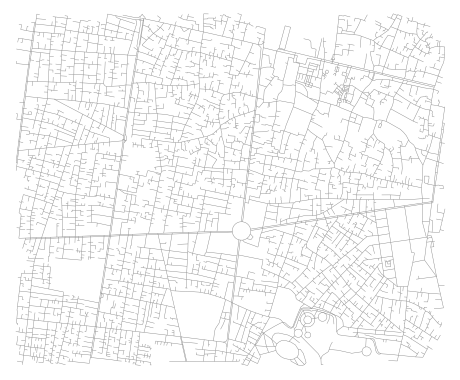

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01a9ce9d30>)

In [ ]:
# Tehran history
import geopandas as gpd

# create a graph, save as a GeoPackage
north , south, east, west = 35.68, 35.66, 51.43,51.40
fp = 'graph.gpkg'
G_Tehran_hist= ox.graph_from_bbox(north, south, east, west , network_type ='walk')
ox.save_graph_geopackage(G_Tehran_hist, fp)

# ensure the index attributes are non-null when you're finished
pass
# load GeoPackage as node/edge GeoDataFrames indexed as described in OSMnx docs
gdf_nodes = gpd.read_file(fp, layer='nodes').set_index('osmid')
gdf_edges = gpd.read_file(fp, layer='edges').set_index(['u', 'v', 'key'])
assert gdf_nodes.index.is_unique and gdf_edges.index.is_unique

# convert the node/edge GeoDataFrames to a MultiDiGraph
graph_attrs = {'crs': 'epsg:4326', 'simplified': True}
G_Tehran_gdf_hist= ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs)
ox.plot_graph(G_Tehran_gdf_hist, node_size= 0 , node_color = 'm', edge_color= 'gray',
              bgcolor='white', edge_linewidth= 0.4, filepath = '/content/Tehran_city_Histoty.png',save=True)

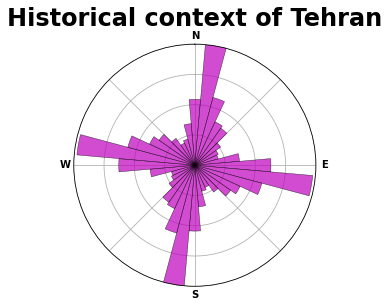

In [ ]:
import matplotlib.pyplot as plt
figsize = (5, 5)
fig, axes = plt.subplots(figsize=figsize, subplot_kw={"projection": "polar"})


Gu_Tehran_hist = ox.add_edge_bearings(ox.get_undirected(G_Tehran_gdf_hist))
fig, ax =ox.bearing.plot_orientation(Gu_Tehran_hist, ax=axes,
                                     title="Historical context of Tehran", area=True, color = 'm')

In [ ]:
# یک سلول برای به دست آمدن اطلاعات هسته تاریخی شهرها
#Tehran_basic_stats_hist
basic_stat_Tehran_hist = ox.basic_stats(Gu_Tehran_hist)


# calculate a normalized measure of orientation_order, Q
H0 = ox.bearing.orientation_entropy(Gu_Tehran_hist, num_bins=36, min_length=0, weight=None)
Hmax = 3.584
Hg = 1.386
orientation_order_Tehran_hist = print({'orientation_order_Tehran_hist ' : 1 -(((H0 - Hg)/(Hmax - Hg))**2)})

# calculate H0 = reperesent street orientation entropy
entropy_Tehran_hist = print({'street orientation entropy_Tehran_hist':
      ox.bearing.orientation_entropy(Gu_Tehran_hist, num_bins=36, min_length=0, weight=None)})

# each city's median street segment lenght_calculate grain
street_length_avg_Tehran_hist = print({'street_length_avg_Tehran_hist' : basic_stat_Tehran_hist['street_length_avg']})


#average node degree
#to measure connectedness
streets_per_node_avg_Tehran_hist = print({'streets_per_node_avg_Tehran_hist: ' : basic_stat_Tehran_hist['streets_per_node_avg']})


#city street network’s average circuity
circuity_avg_Tehran_hist = print({'circuity_avg_Tehran_hist' : basic_stat_Tehran_hist['circuity_avg']})


# proportion of nodes that are dead_ends
dead_ends_Tehran_hist = print( {'streets_per_node_dead_ends_Tehran':
      basic_stat_Tehran_hist['streets_per_node_proportions'][1]})




data = [{'\u03C6' : 1 -(((H0 - Hg)/(Hmax - Hg))**2),
        'street orientation entropy_Tehran':ox.bearing.orientation_entropy(Gu_Tehran_hist,
                                            num_bins=36, min_length=0, weight=None),
        'street_length_avg_Tehran' : basic_stat_Tehran_hist['street_length_avg'],
        'streets_per_node_avg_Tehran: ' : basic_stat_Tehran_hist['streets_per_node_avg'],
        '\u03C2 ' : basic_stat_Tehran_hist['circuity_avg'],
        'streets_per_node_dead_ends_Tehran': basic_stat_Tehran_hist['streets_per_node_proportions'][1],
        'streets_per_node_four_way_Tehran': basic_stat_Tehran_hist['streets_per_node_proportions'][4]}]



pd.DataFrame.from_records(data,index=['TehranY_hist'])

{'orientation_order_Tehran_hist ': 0.3890614094771183}
{'street orientation entropy_Tehran_hist': 3.1040130855987416}
{'street_length_avg_Tehran_hist': 33.564971525182294}
{'streets_per_node_avg_Tehran_hist: ': 2.308614384396587}
{'circuity_avg_Tehran_hist': 1.0411980621370571}
{'streets_per_node_dead_ends_Tehran': 0.3874441284030882}


,φ,street orientation entropy_Tehran,street_length_avg_Tehran,streets_per_node_avg_Tehran:,ς,streets_per_node_dead_ends_Tehran,streets_per_node_four_way_Tehran
TehranY_hist,0.389061,3.104013,33.564972,2.308614,1.041198,0.387444,0.08269


In [ ]:
#Tehran_basic_stats
basic_stat_Tehran = ox.basic_stats(Gu_Tehran)
basic_stat_Tehran

{'n': 107195,
 'm': 137977,
 'k_avg': 2.574317831988432,
 'edge_length_total': 11056071.397999855,
 'edge_length_avg': 80.12981437485853,
 'streets_per_node_avg': 2.5761742618592285,
 'streets_per_node_counts': {0: 0,
  1: 29559,
  2: 346,
  3: 63516,
  4: 13533,
  5: 227,
  6: 12,
  7: 1,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.27574980176314196,
  2: 0.003227762488922058,
  3: 0.5925276365502122,
  4: 0.12624656000746304,
  5: 0.002117636083772564,
  6: 0.00011194551984700779,
  7: 9.328793320583982e-06,
  8: 9.328793320583982e-06},
 'intersection_count': 77636,
 'street_length_total': 11056071.397999855,
 'street_segment_count': 137977,
 'street_length_avg': 80.12981437485853,
 'circuity_avg': 1.046018643230004,
 'self_loop_proportion': 0.0015437355501279199}

In [ ]:
# calculate a normalized measure of orientation_order, Q
H0 = ox.bearing.orientation_entropy(Gu_Tehran, num_bins=36, min_length=0, weight=None)
Hmax = 3.584
Hg = 1.386
orientation_order_Tehran = print({'orientation_order_Tehran ' : 1 -(((H0 - Hg)/(Hmax - Hg))**2)})

{'orientation_order_Tehran ': 0.1304350358503551}


In [ ]:
# calculate H0 = reperesent street orientation entropy
entropy_Tehran = print({'street orientation entropy_Tehran':
      ox.bearing.orientation_entropy(Gu_Tehran, num_bins=36, min_length=0, weight=None)})

{'street orientation entropy_Tehran': 3.4356452700551925}


In [ ]:
# each city's median street segment lenght_calculate grain
street_length_avg_Tehran = print({'street_length_avg_Tehran' : basic_stat_Tehran['street_length_avg']})

{'street_length_avg_Tehran': 80.12981437485853}


In [ ]:
#average node degree
#to measure connectedness
streets_per_node_avg_Tehran = print({'streets_per_node_avg_Tehran: ' : basic_stat_Tehran['streets_per_node_avg']})

{'streets_per_node_avg_Tehran: ': 2.5761742618592285}


In [ ]:
#city street network’s average circuity
circuity_avg_Tehran = print({'circuity_avg_Tehran' : basic_stat_Tehran['circuity_avg']})

{'circuity_avg_Tehran': 1.046018643230004}


In [ ]:
# proportion of nodes that are dead_ends
dead_ends_Tehran = print( {'streets_per_node_dead_ends_Tehran':
      basic_stat_Tehran['streets_per_node_proportions'][1]})

{'streets_per_node_dead_ends_Tehran': 0.27574980176314196}


In [ ]:
# proportion of nodes that are four_way
four_way_Tehran = print({'streets_per_node_four_way_Tehran':
      basic_stat_Tehran['streets_per_node_proportions'][4]})


{'streets_per_node_four_way_Tehran': 0.12624656000746304}


In [ ]:
data = [{'\u03C6' : 1 -(((H0 - Hg)/(Hmax - Hg))**2),
        'street orientation entropy_Tehran':ox.bearing.orientation_entropy(Gu_Tehran,
                                            num_bins=36, min_length=0, weight=None),
        'street_length_avg_Tehran' : basic_stat_Tehran['street_length_avg'],
        'streets_per_node_avg_Tehran: ' : basic_stat_Tehran['streets_per_node_avg'],
        '\u03C2 ' : basic_stat_Tehran['circuity_avg'],
        'streets_per_node_dead_ends_Tehran ': basic_stat_Tehran['streets_per_node_proportions'][1],
        'streets_per_node_four_way_Tehran': basic_stat_Tehran['streets_per_node_proportions'][4]}]



pd.DataFrame.from_records(data,index=['Tehran']).round(decimals=3)

,φ,street orientation entropy_Tehran,street_length_avg_Tehran,streets_per_node_avg_Tehran:,ς,streets_per_node_dead_ends_Tehran,streets_per_node_four_way_Tehran
Tehran,0.13,3.436,80.13,2.576,1.046,0.276,0.126
